In [46]:
import json
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import mplhep as mh

from hist.hist import Hist
from hist.axis import Regular

from pathlib import Path

from typing import Optional, Union

In [51]:
def plot_eff_hist(input_path: Path,
                          geom_path: Path,
                          percentage: bool = True,
                          roll_blacklist_path: Optional[Path] = None,
                          region: str = "all",
                          ax: Optional[plt.Axes] = None,
                          facecolor= "#d3f5e4",
                          edgecolor = "#007700",
                          data_legend = "2022"
):
    input_file = uproot.open(input_path)
    geom = pd.read_csv(geom_path)
    if roll_blacklist_path is None:
        roll_blacklist = set()
    else:
        with open(roll_blacklist_path) as stream:
            roll_blacklist = set(json.load(stream))

    h_total = uproot.open(f"{str(input_path)}:total").to_hist()
    h_passed = uproot.open(f"{str(input_path)}:passed").to_hist()

    total = h_total.values()
    passed = h_passed.values()

    eff = np.divide(h_passed.values(), h_total.values(), out=np.zeros_like(total), where=(total > 0))

    roll_axis = h_total.axes[0]
    roll_name_list = [roll_axis.value(idx) for idx in range(roll_axis.size)]

    if region == "all":
        is_region = np.vectorize(lambda item: type(item) is str)
    elif region == "barrel":
        is_region = np.vectorize(lambda item: item.startswith('W'))
    elif region == "endcap":
        is_region = np.vectorize(lambda item: item.startswith('RE'))
    
    region_mask =  is_region(roll_name_list)

    is_blacklist = np.vectorize(lambda item: item in roll_blacklist)
    blacklist_mask = is_blacklist(roll_name_list)

    eff = eff[region_mask & ~blacklist_mask]
    eff = eff * 100

    hist, bins = np.histogram(eff, bins=101, range=(0, 101))
    underflow = len(eff[eff < 70])
    underflow_percent = underflow / len(eff) * 100
    mean_over70 = eff[eff > 70].mean()

    mh.histplot(
        hist,
        bins=bins,
        ax=ax,
        yerr = False,
        histtype="fill",
        facecolor=facecolor,
        edgecolor=edgecolor,
        linewidth=1.5,
        flow=None,
        label=f"{data_legend}        {mean_over70 : .1f}              {underflow_percent : .1f}\t ",
        alpha=0.5,
        hatch="///"
    )
    return ax

/tmp/ipykernel_2139798/785532426.py:45: UserWarning: Glyph 9 (	) missing from current font.
  fig.savefig(output_dir / "run3-endcap.png")
/u/user/sjws5411/micromamba/envs/ds4hep/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/u/user/sjws5411/micromamba/envs/ds4hep/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


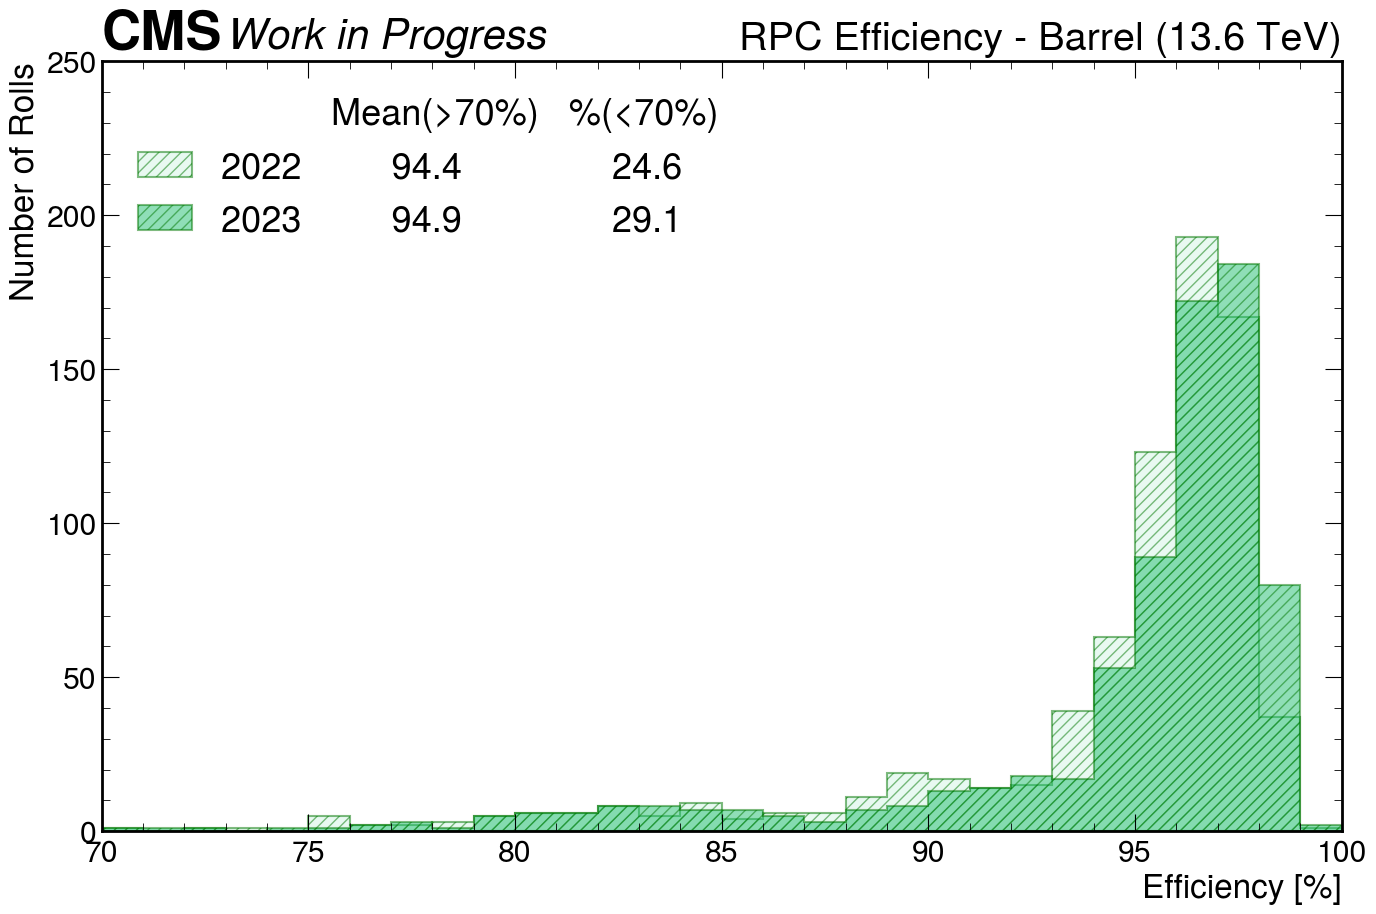

In [48]:
working_dir = Path('/u/user/sjws5411/Workspace/Efficiency/CMSSW_14_1_0_pre2/Workspace-RPC/240425-TnP_RPC24/TnP_Plotting')

mh.style.use(mh.styles.CMS)
fig, ax = plt.subplots(figsize=(16, 10))

label = "Work in Progress"
com = 13.6

mh.cms.label(ax=ax, data=True, label=label, com=com, year="RPC Efficiency - Barrel", fontsize=30)
ax.set_xlabel('Efficiency [%]', fontsize=24)
ax.set_ylabel('Number of Rolls', fontsize=24)
ax.set_xlim(70, 100)
ax.set_ylim(0, 250)
ax.plot(np.NaN, np.NaN, '-', color="None", label="           Mean(>70%)   %(<70%)")

ax = plot_eff_hist(
    input_path = working_dir / 'data/Run2022.root',
    geom_path = working_dir / 'geometry/run3.csv',
    roll_blacklist_path = working_dir / 'blacklist/roll-blacklist.json',
    region = "barrel",
    ax = ax,
    facecolor="#d3f5e4",
    edgecolor = "#007700",
    data_legend = "2022"
)

ax = plot_eff_hist(
    input_path = working_dir / 'data/Run2023.root',
    geom_path = working_dir / 'geometry/run3.csv',
    roll_blacklist_path = working_dir / 'blacklist/roll-blacklist.json',
    region = "barrel",
    ax = ax,
    facecolor="#21bf70",
    edgecolor = "#007700",
    data_legend = "2023"
)

ax.legend(fontsize="26", loc='upper left')

output_dir = working_dir / 'plotting' / 'eff-hist'

if not output_dir.exists():
    output_dir.mkdir(parents=True)
    
fig.savefig(output_dir / "run3-endcap.png")

/tmp/ipykernel_2139798/1902689889.py:45: UserWarning: Glyph 9 (	) missing from current font.
  fig.savefig(output_dir / "run3-endcap.png")


/u/user/sjws5411/micromamba/envs/ds4hep/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/u/user/sjws5411/micromamba/envs/ds4hep/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


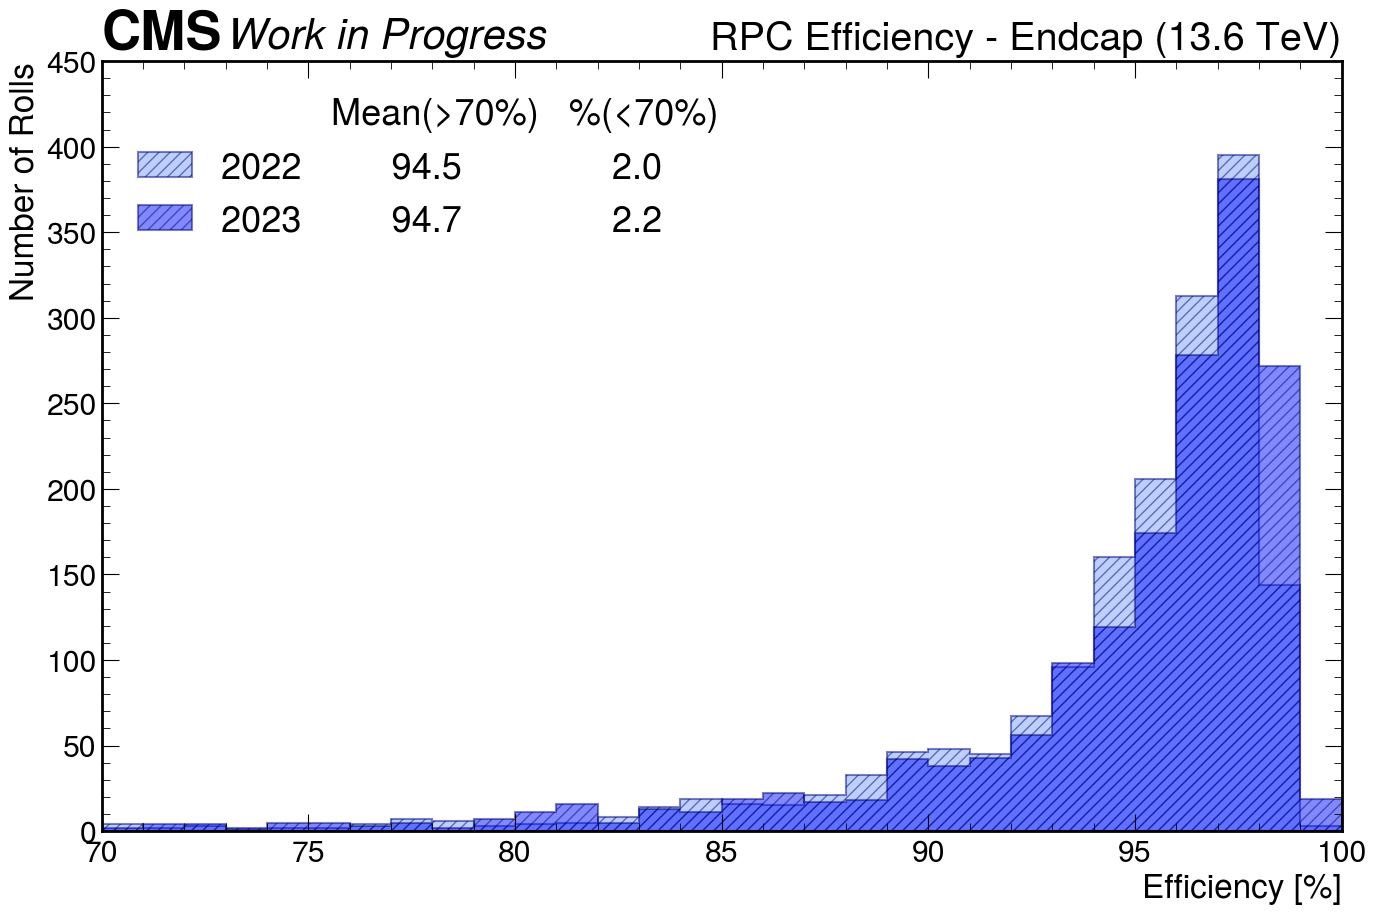

In [63]:
working_dir = Path('/u/user/sjws5411/Workspace/Efficiency/CMSSW_14_1_0_pre2/Workspace-RPC/240425-TnP_RPC24/TnP_Plotting')

mh.style.use(mh.styles.CMS)
fig, ax = plt.subplots(figsize=(16, 10))

label = "Work in Progress"
com = 13.6

mh.cms.label(ax=ax, data=True, label=label, com=com, year="RPC Efficiency - Endcap", fontsize=30)
ax.set_xlabel('Efficiency [%]', fontsize=24)
ax.set_ylabel('Number of Rolls', fontsize=24)
ax.set_xlim(70, 100)
ax.set_ylim(0, 450)
ax.plot(np.NaN, np.NaN, '-', color="None", label="           Mean(>70%)   %(<70%)")

ax = plot_eff_hist(
    input_path = working_dir / 'data/Run2022.root',
    geom_path = working_dir / 'geometry/run3.csv',
    roll_blacklist_path = working_dir / 'blacklist/roll-blacklist.json',
    region = "endcap",
    ax = ax,
    facecolor="#7CA1FF",
    edgecolor = "#000775",
    data_legend = "2022"
)

ax = plot_eff_hist(
    input_path = working_dir / 'data/Run2023.root',
    geom_path = working_dir / 'geometry/run3.csv',
    roll_blacklist_path = working_dir / 'blacklist/roll-blacklist.json',
    region = "endcap",
    ax = ax,
    facecolor="#0714FF",
    edgecolor = "#000775",
    data_legend = "2023"
)

ax.legend(fontsize="26", loc='upper left')

output_dir = working_dir / 'plotting' / 'eff-hist'

if not output_dir.exists():
    output_dir.mkdir(parents=True)
    
fig.savefig(output_dir / "run3-endcap.png")

/tmp/ipykernel_2139798/2183019421.py:45: UserWarning: Glyph 9 (	) missing from current font.
  fig.savefig(output_dir / "run3-all.png")
/u/user/sjws5411/micromamba/envs/ds4hep/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/u/user/sjws5411/micromamba/envs/ds4hep/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


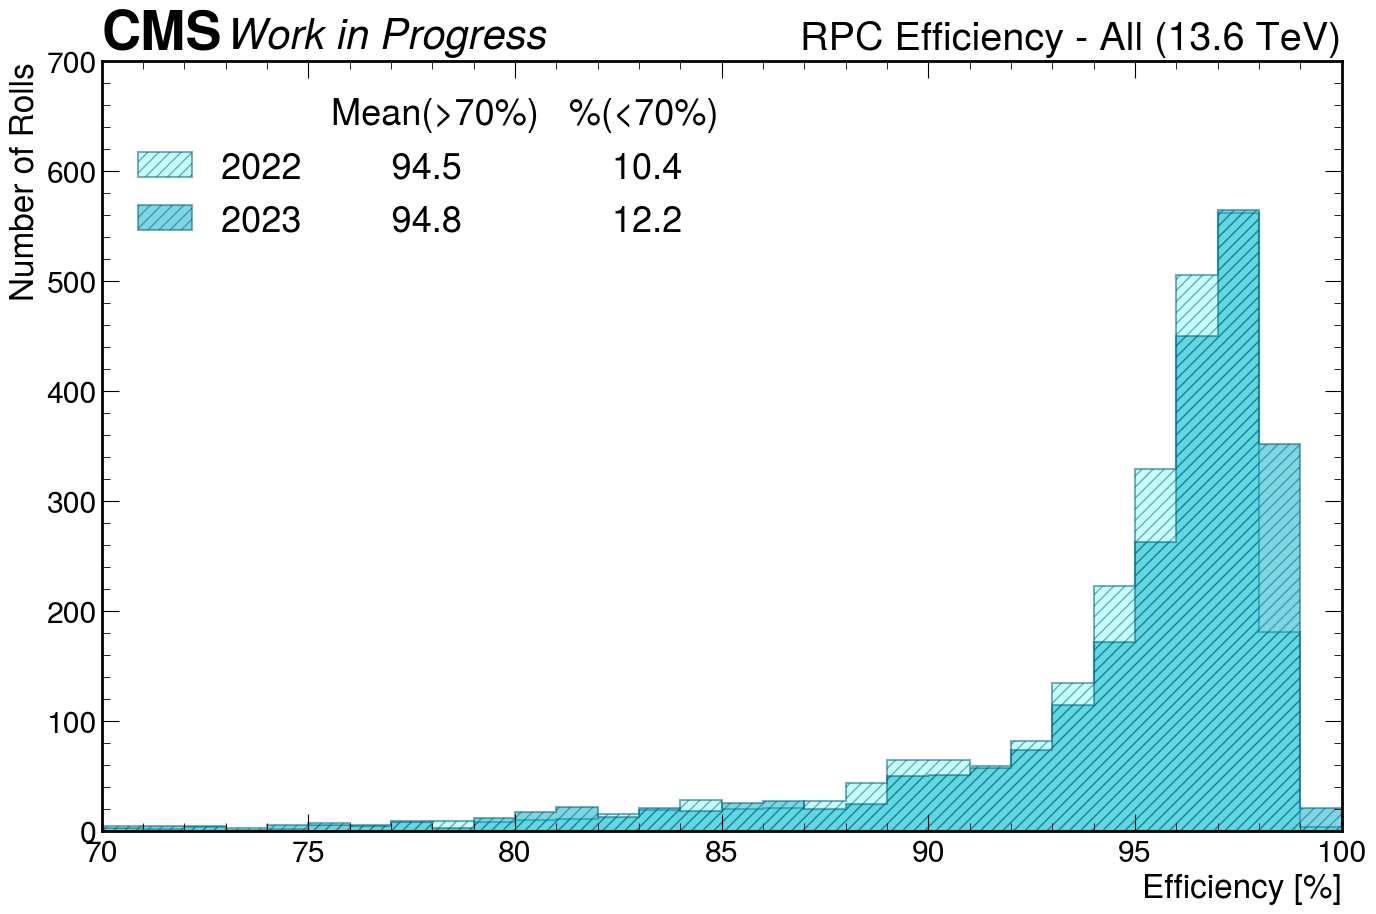

In [62]:
working_dir = Path('/u/user/sjws5411/Workspace/Efficiency/CMSSW_14_1_0_pre2/Workspace-RPC/240425-TnP_RPC24/TnP_Plotting')

mh.style.use(mh.styles.CMS)
fig, ax = plt.subplots(figsize=(16, 10))

label = "Work in Progress"
com = 13.6

mh.cms.label(ax=ax, data=True, label=label, com=com, year="RPC Efficiency - All", fontsize=30)
ax.set_xlabel('Efficiency [%]', fontsize=24)
ax.set_ylabel('Number of Rolls', fontsize=24)
ax.set_xlim(70, 100)
ax.set_ylim(0, 700)
ax.plot(np.NaN, np.NaN, '-', color="None", label="           Mean(>70%)   %(<70%)")

ax = plot_eff_hist(
    input_path = working_dir / 'data/Run2022.root',
    geom_path = working_dir / 'geometry/run3.csv',
    roll_blacklist_path = working_dir / 'blacklist/roll-blacklist.json',
    region = "all",
    ax = ax,
    facecolor="#8EFFF9",
    edgecolor = "#005F77",
    data_legend = "2022"
)

ax = plot_eff_hist(
    input_path = working_dir / 'data/Run2023.root',
    geom_path = working_dir / 'geometry/run3.csv',
    roll_blacklist_path = working_dir / 'blacklist/roll-blacklist.json',
    region = "all",
    ax = ax,
    facecolor="#00AEC9",
    edgecolor = "#005F77",
    data_legend = "2023"
)

ax.legend(fontsize="26", loc='upper left')

output_dir = working_dir / 'plotting' / 'eff-hist'

if not output_dir.exists():
    output_dir.mkdir(parents=True)
    
fig.savefig(output_dir / "run3-all.png")